In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# roughness_dir = "/Volumes/SEAGATE/roughness_apr2016_from_PH/roughness_predicted"
roughness_dir = '/Volumes/SEAGATE/july_2016/roughness_1_to_16_july2016_subdirs'

In [3]:
os.path.isdir(roughness_dir)

True

In [4]:
# path to training dataset

# trainingDS_dir = "/Users/ehsanmos/Documents/RnD/MISR_lab/ML_research/training_dataset"
trainingDS_dir = "/Volumes/SEAGATE/july_2016"


trainingDS_csv = "inSample_lon197_200_atmmodel_july_2016_1to16.csv"
old_trainig_ds = 'off'


# # old method
# trainingDS_csv = "atmmodel_april_2016.csv"
# old_trainig_ds = 'on'


In [5]:
old_trainig_ds

'off'

In [6]:
# open/read input dataset

atm_trainigDS_fp = os.path.join(trainingDS_dir, trainingDS_csv)
atm_transect = pd.read_csv(atm_trainigDS_fp)

In [7]:
atm_transect.shape

(4398, 15)

In [8]:
# info of path-orbit-block and then select absed on this info

atm_transect['path'].value_counts()

84     1010
93      806
91      616
164     473
157     446
86      344
166     325
171     131
82      122
148      32
98       32
100      31
155      30
Name: path, dtype: int64

In [9]:
atm_transect['orbit'].value_counts()

88141    1010
88127     806
88156     616
88146     473
88131     446
88112     344
88117     325
88161     131
88170     122
88145      32
88171      32
88142      31
88160      30
Name: orbit, dtype: int64

In [10]:
atm_transect['block'].value_counts()

29    1372
28     948
9      675
10     285
30     267
27     222
11     191
8      122
7      102
31      89
13      32
26      32
25      31
12      30
Name: block, dtype: int64

In [11]:
# select POB to extract
# note: we selected an arbiterary POB as following 

selected_path = 91
selected_orbit = 88156
selected_block = 9

In [12]:
if (old_trainig_ds == 'on'):
    # rename columns
    atm_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                 ' line':'line', ' sample':'sample',\
                                ' rms':'mean_ATM_roughness'}, inplace=True)
    

In [13]:
atm_transect.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [14]:
# remove zeros

filter_zeros_cond = (atm_transect['path']==0) & (atm_transect['orbit']==0) & (atm_transect['block']==0)

zero_index_list = atm_transect.index[filter_zeros_cond].tolist()
print(len(zero_index_list))

atm_transect.drop(labels=zero_index_list, axis=0, inplace=True)
atm_transect.head()

0


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,93,88127,29,52,1912,74.129692,199.405884,-1.0,-1.0,-1.0,12.21375,0.5,4.0,1,1.464982
1,93,88127,29,52,1911,74.131224,199.399082,-1.0,-1.0,-1.0,7.80375,0.5,4.0,1,1.717774
2,93,88127,29,52,1910,74.132759,199.392283,-1.0,-1.0,-1.0,9.03625,0.5,4.0,1,3.045730
3,93,88127,29,52,1909,74.134296,199.385486,-1.0,-1.0,-1.0,9.03125,0.5,4.0,1,5.542873
4,93,88127,29,52,1908,74.135832,199.378687,-1.0,-1.0,-1.0,9.81000,0.5,4.5,1,3.955064


In [15]:
# select a smaller subset of transect, like the first 1000 points (or 10)

# max_step = 1119
# max_step = 20462
# max_step = 1000
max_step = atm_transect.shape[0]

atm_transect_small = atm_transect.iloc[0:max_step]

In [16]:
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 0 to 4397
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                4398 non-null   int64  
 1   orbit               4398 non-null   int64  
 2   block               4398 non-null   int64  
 3   line                4398 non-null   int64  
 4   sample              4398 non-null   int64  
 5   lat                 4398 non-null   float64
 6   lon                 4398 non-null   float64
 7    an                 4398 non-null   float64
 8    ca                 4398 non-null   float64
 9    cf                 4398 non-null   float64
 10  mean_ATM_roughness  4398 non-null   float64
 11   weight             4398 non-null   float64
 12  npts                4398 non-null   float64
 13   cloud              4398 non-null   int64  
 14   var                4398 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 549.8 KB


In [17]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [18]:
atm_transect_small = atm_transect_small.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
atm_transect_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4398 entries, 0 to 4397
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                4398 non-null   int64  
 1   orbit               4398 non-null   int64  
 2   block               4398 non-null   int64  
 3   line                4398 non-null   int64  
 4   sample              4398 non-null   int64  
 5   lat                 4398 non-null   float64
 6   lon                 4398 non-null   float64
 7    an                 4398 non-null   float64
 8    ca                 4398 non-null   float64
 9    cf                 4398 non-null   float64
 10  mean_ATM_roughness  4398 non-null   float64
 11   weight             4398 non-null   float64
 12  npts                4398 non-null   float64
 13   cloud              4398 non-null   int64  
 14   var                4398 non-null   float64
dtypes: float64(9), int64(6)
memory usage: 549.8 KB


In [19]:
atm_transect_small.head()

,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
0,93,88127,29,52,1912,74.129692,199.405884,-1.0,-1.0,-1.0,12.21375,0.5,4.0,1,1.464982
1,93,88127,29,52,1911,74.131224,199.399082,-1.0,-1.0,-1.0,7.80375,0.5,4.0,1,1.717774
2,93,88127,29,52,1910,74.132759,199.392283,-1.0,-1.0,-1.0,9.03625,0.5,4.0,1,3.045730
3,93,88127,29,52,1909,74.134296,199.385486,-1.0,-1.0,-1.0,9.03125,0.5,4.0,1,5.542873
4,93,88127,29,52,1908,74.135832,199.378687,-1.0,-1.0,-1.0,9.81000,0.5,4.5,1,3.955064


In [20]:
# set filters to select a MISR block

path_filter = (atm_transect_small['path']==selected_path)
orbit_filter = (atm_transect_small['orbit']==selected_orbit)
block_filter = (atm_transect_small['block']==selected_block)

atm_transect_small_filtered = atm_transect_small.loc[path_filter & orbit_filter]
atm_transect_small_filtered.shape

(616, 15)

In [21]:
# sort by column ("line")

atm_transect_small_filtered.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
atm_transect_small_filtered.head(10)


/Applications/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
3015,91,88156,28,131,1219,76.038862,199.999031,0.617934,0.769130,0.642085,3.662500,0.5,4.0,1,0.202839
3014,91,88156,28,132,1219,76.037928,199.995162,0.617791,0.758841,0.636512,9.585000,0.5,2.0,1,2.578299
3013,91,88156,28,132,1218,76.037227,199.992257,0.625937,0.764700,0.633368,6.220000,0.5,1.0,1,2.680000
3012,91,88156,28,133,1218,76.035355,199.984503,0.623936,0.754268,0.630938,3.267500,0.5,4.0,1,0.101704
3011,91,88156,28,134,1218,76.033715,199.977704,0.620220,0.743836,0.625651,3.327143,0.5,3.5,1,0.071056
3010,91,88156,28,135,1218,76.031837,199.969916,0.619506,0.737691,0.627794,3.412500,0.5,4.0,1,0.403663
3009,91,88156,28,136,1218,76.030192,199.963082,0.624079,0.732832,0.629366,3.992857,0.5,3.5,1,0.969193
3008,91,88156,28,137,1218,76.028546,199.956229,0.629366,0.729402,0.621506,3.307143,0.5,3.5,1,0.156270
3007,91,88156,28,138,1218,76.026663,199.948380,0.633511,0.726830,0.612646,6.750000,0.5,4.0,1,3.154711
3006,91,88156,28,139,1218,76.025015,199.941501,0.637798,0.722685,0.615647,5.977143,0.5,3.5,1,2.456744


In [22]:
# check for duplicates in rows of dataset




## find roughess.dat files

In [23]:
misr_roughness_in_pixel_list = []


# for irow in range(atm_transect_small.shape[0]):
for irow in range(atm_transect_small_filtered.shape[0]):


#     path = atm_transect_small['#path'].iloc[irow]
#     orbit = atm_transect_small[' orbit'].iloc[irow]
#     block = atm_transect_small[' img_block'].iloc[irow]
#     line = atm_transect_small[' line'].iloc[irow]
#     sample = atm_transect_small[' sample'].iloc[irow]
    
    
    path = atm_transect_small_filtered['path'].iloc[irow]
    orbit = atm_transect_small_filtered['orbit'].iloc[irow]
    block = atm_transect_small_filtered['block'].iloc[irow]
    line = atm_transect_small_filtered['line'].iloc[irow]
    sample = atm_transect_small_filtered['sample'].iloc[irow]


    # zfill() path and string it
    if path < 100:
        path_str = str(path).zfill(3)
    else:
        path_str = str(path)


    # zfill() block and string it
    if block < 10:
        block_str = str(block).zfill(2)
    else:
        block_str = str(block)


    # pattern of roughness.dat file
    roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(orbit)+"_B0"+block_str+".dat"
    print('looking for pattern: %s' %roughness_file_pattern)

    # find roughness file
    rough_file_list = glob.glob(os.path.join(roughness_dir, roughness_file_pattern))

    if (len(rough_file_list) < 1):
        raise ValueError("roughness list came out empty!")

    if (len(rough_file_list) > 1):
        raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")


    # open it and change binary to array
    rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
#     print(rough_2d_arr.shape)
    misr_roughness = rough_2d_arr[int(line), int(sample)]
    # append predixted value to our list
    misr_roughness_in_pixel_list.append(misr_roughness)

    

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

        
print("\ntotal MISR roughness files: %s" %len(misr_roughness_in_pixel_list))


looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking 

looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking for pattern: roughness_toa_refl_P091_O088156_B027.dat
looking 

looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking for pattern: roughness_toa_refl_P091_O088156_B029.dat
looking 

looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking 

looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking for pattern: roughness_toa_refl_P091_O088156_B028.dat
looking 

In [24]:
atm_transect_small_filtered.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [25]:
# build a DF from both ATM and MISR lists

atm_transect_small_filtered['MISR-roughness'] = misr_roughness_in_pixel_list
atm_transect_small_filtered.columns

/var/folders/0l/r3vc28ks6n99yn157sn20whw0000gn/T/ipykernel_62729/4230507440.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atm_transect_small_filtered['MISR-roughness'] = misr_roughness_in_pixel_list


Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var',
       'MISR-roughness'],
      dtype='object')

In [26]:
# remove negative values from DF

negative_misr_index_list = atm_transect_small_filtered.loc[atm_transect_small_filtered['MISR-roughness']<0].index
print(len(atm_transect_small_filtered))
atm_transect_small_filtered.drop(negative_misr_index_list, axis='index', inplace=True)

616


/Applications/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [27]:
row_count = atm_transect_small_filtered.shape[0]

## plot transect

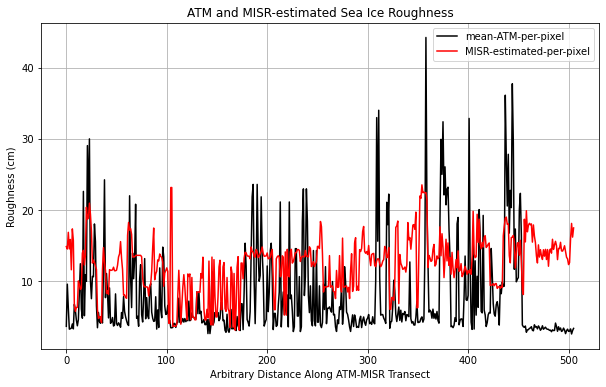

In [28]:
# x = range(len(misr_roughness_in_pixel_list))
x= range(row_count)

fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(x, atm_transect_small_filtered['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
ax.plot(x, atm_transect_small_filtered['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# Same as above
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
ax.set_ylabel('Roughness (cm)')
ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
ax.grid(True)
ax.legend(loc='upper right');

## plot histogram

Text(0.5, 1.0, 'Histogram')

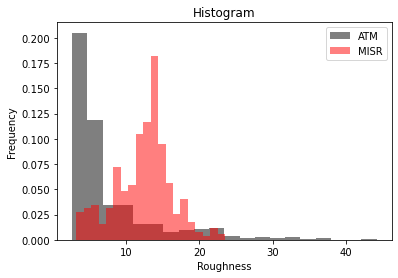

In [29]:
plt.hist(atm_transect_small_filtered['mean_ATM_roughness'], density=True, bins=20, label='ATM', color='black', alpha=0.5)  # density=False would make counts
plt.hist(atm_transect_small_filtered['MISR-roughness'], density=True, bins=20, label='MISR', color='red', alpha=0.5)  # density=False would make counts

plt.xlabel('Roughness')
plt.ylabel('Frequency')
plt.legend(loc="upper right")
plt.title("Histogram")


## statistics

In [30]:
# describe the statistics

atm_transect_small_filtered['mean_ATM_roughness'].describe()

count    506.000000
mean       7.775404
std        6.468608
min        2.590000
25%        3.906667
50%        5.096786
75%        9.218214
max       44.230000
Name: mean_ATM_roughness, dtype: float64

In [31]:
# change list to DF

# misr_roughness_in_pixel_df = pd.DataFrame(misr_roughness_in_pixel_list, columns=['rms'])

In [32]:
atm_transect_small_filtered['MISR-roughness'].describe()

count    506.000000
mean      12.353882
std        3.863289
min        3.133358
25%        9.529303
50%       13.033644
75%       14.456417
max       23.529571
Name: MISR-roughness, dtype: float64